In [1]:
# Importing the necessary libraries as of now.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
import os

In [2]:
os.getcwd()

os.chdir(r"C:\Users\91981\Desktop\6wresearch")

pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_excel('Game.xlsx' , sheet_name='Game_data')

In [4]:
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,€750K,€6K,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,"Jul 19, 2014",NaN,2019,5'10,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,€21.5M,€21K,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,"Jul 16, 2018",NaN,2021,5'7,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,€4M,€23K,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,"Jul 9, 2015",NaN,2019,5'7,159lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,€240K,€2K,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,"Aug 31, 2017",NaN,2019,5'11,168lbs,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,€150K,€4K,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,"Jul 6, 2018",NaN,2019,5'6,154lbs,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


In [5]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [6]:
# Removing the special symbols from the "Wage" column and converting it to float, so that we can do our analysis to check the outliers present.

df['Wage'].replace({'\€': '', 'K': ''}, regex=True, inplace=True)
df['Wage'] = df['Wage'].astype(float)

In [7]:
df['Wage']

0         6.0
1        21.0
2        23.0
3         2.0
4         4.0
         ... 
18202     1.0
18203     1.0
18204     1.0
18205     1.0
18206     1.0
Name: Wage, Length: 18207, dtype: float64

## Que1) Building a histogram to see how our data is distributed also to see the outliers, Outliers lies in the value greater than 70

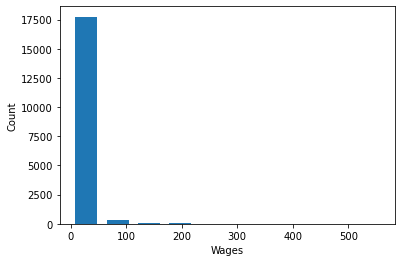

In [8]:
plt.hist(df.Wage,rwidth=0.7)
plt.xlabel('Wages')
plt.ylabel("Count")
plt.show()

In [9]:
# Checking how many players are getting "1k" "2k" "3K" etc Wages to identify the population

pd.value_counts(df.Wage)

Wage
1.0      4900
2.0      2827
3.0      1857
4.0      1255
5.0       869
         ... 
190.0       1
235.0       1
455.0       1
200.0       1
225.0       1
Name: count, Length: 144, dtype: int64

In [10]:
pd.set_option("display.max_rows", None)

## Using Boxplot is a great way to visualize the outliers present in the data

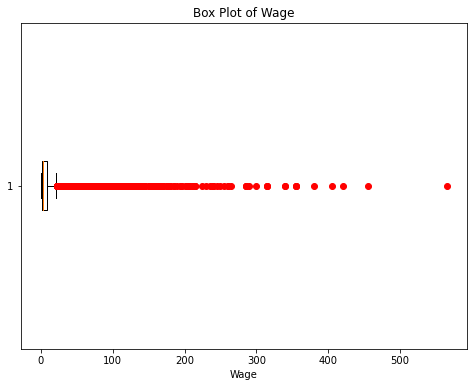

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Wage'], vert=False, sym='r')  # 'vert=False' for horizontal box plot, 'sym='r'' to mark outliers with red color
plt.xlabel('Wage')
plt.title('Box Plot of Wage')
plt.show()

### Here is another approach below to identify outliers in Wages. The Wages are given in "K" thousand Euros, and based on the previous analysis, we observed that the majority of players receive salaries in the range of 1-5k. However, there are very few players receiving wages above this range. We decided to check for outliers by setting defined thresholds below:

### Wages greater than 500: Only 1 person falls into this category.
### Wages greater than 400: Only 4 people are in this group.
### Wages greater than 350: There are only 8 individuals with wages above this threshold.
### Although these data points may be correct, they clearly stand as outliers since they do not align with the majority of the datapoints.

### The identified thresholds indicate that these few individuals with significantly higher wages are potential outliers due to their deviation from the typical salary distribution.

In [12]:
# Define the thresholds
thresholds = [10 , 20 , 30 , 40 , 50 , 60 , 70, 80, 90, 100 , 150 , 200 , 250 , 300 , 350 , 400 , 500]

# Iterate through the thresholds and calculate the sum of values for each threshold
for threshold in thresholds:
    sum_values_greater_than_threshold = (df['Wage'] > threshold).sum()
    print(f"Sum of values greater than {threshold}: {sum_values_greater_than_threshold}")

Sum of values greater than 10: 4018
Sum of values greater than 20: 2142
Sum of values greater than 30: 1283
Sum of values greater than 40: 870
Sum of values greater than 50: 578
Sum of values greater than 60: 417
Sum of values greater than 70: 339
Sum of values greater than 80: 272
Sum of values greater than 90: 226
Sum of values greater than 100: 185
Sum of values greater than 150: 82
Sum of values greater than 200: 44
Sum of values greater than 250: 22
Sum of values greater than 300: 13
Sum of values greater than 350: 8
Sum of values greater than 400: 4
Sum of values greater than 500: 1


In [13]:
# Printing the exact outliers Wages which are greater than 400 in our data

df[df['Wage'] > 400].index

Index([45, 699, 1519, 1575], dtype='int64')

## Que - 2) Analyze the distribution for potential column.							
					


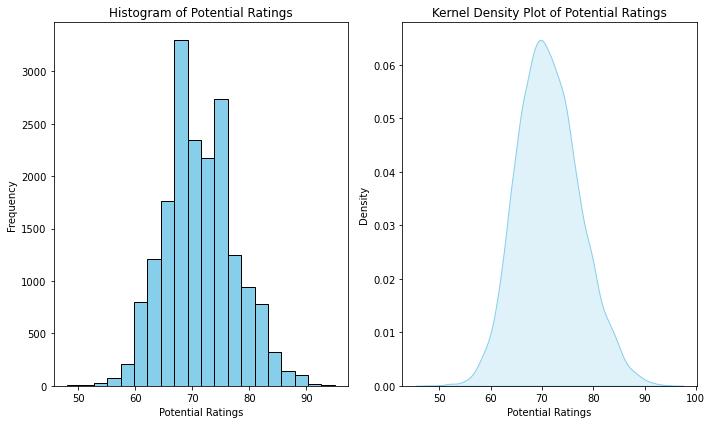

The 'Potential' data does not follow a normal distribution.
Mean Potential: 71.31
Standard Deviation Potential: 6.14
Skewness Potential: 0.27
Kurtosis Potential: 0.04


C:\Users\91981\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
from scipy.stats import shapiro
df_copy4 = df.copy()

# Drop any missing values in the 'Potential' column
df_copy4.dropna(subset=['Potential'], inplace=True)

# Step 1: Calculate descriptive statistics
mean_potential = df_copy4['Potential'].mean()
std_potential = df_copy4['Potential'].std()
skewness_potential = df_copy4['Potential'].skew()
kurtosis_potential = df_copy4['Potential'].kurtosis()

# Step 2: Visualize the distribution using a histogram and kernel density plot
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_copy4['Potential'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Potential Ratings')
plt.xlabel('Potential Ratings')
plt.ylabel('Frequency')

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df_copy4['Potential'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Potential Ratings')
plt.xlabel('Potential Ratings')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Step 3: Perform a normality test (Shapiro-Wilk test)
statistic, p_value = shapiro(df_copy4['Potential'])

# Step 4: Check if the data follows a normal distribution based on the p-value
if p_value > 0.05:
    print("The 'Potential' data follows a normal distribution.")
else:
    print("The 'Potential' data does not follow a normal distribution.")

# Step 5: Interpret the findings
print(f"Mean Potential: {mean_potential:.2f}")
print(f"Standard Deviation Potential: {std_potential:.2f}")
print(f"Skewness Potential: {skewness_potential:.2f}")
print(f"Kurtosis Potential: {kurtosis_potential:.2f}")

## Que-3 ) Difference between normal and student t distribution explain it using 'potential' column.								


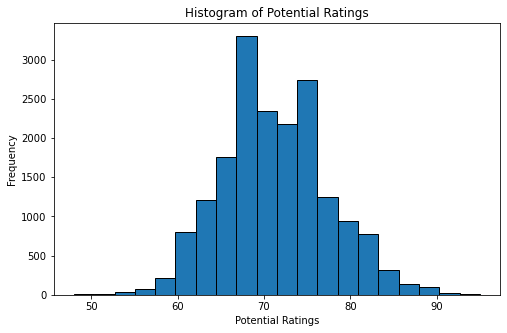

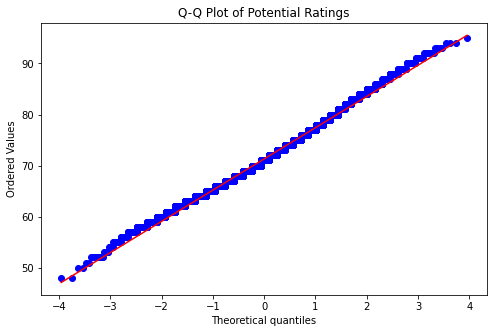

Shapiro-Wilk Test: Statistic = 0.9930369853973389, p-value = 1.5964029697907152e-28
The 'Potential' data does not follow a normal distribution.


C:\Users\91981\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
# Step 1: Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Potential'], bins=20, edgecolor='black')
plt.title('Histogram of Potential Ratings')
plt.xlabel('Potential Ratings')
plt.ylabel('Frequency')
plt.show()

# Step 2: Q-Q Plot
plt.figure(figsize=(8, 5))
stats.probplot(df['Potential'], plot=plt)
plt.title('Q-Q Plot of Potential Ratings')
plt.show()

# Step 3: Shapiro-Wilk Test
statistic, p_value = stats.shapiro(df['Potential'])
alpha = 0.05

print(f"Shapiro-Wilk Test: Statistic = {statistic}, p-value = {p_value}")

if p_value > alpha:
    print("The 'Potential' data follows a normal distribution.")
else:
    print("The 'Potential' data does not follow a normal distribution.")

## Que-4) Difference between normal and standard normal distribution explain it using 'potential' column.									

It look like the data in the "Potential" column is already approximately normally distributed or does not exhibit significant variability, as we are not seeing any changes in both the histogram

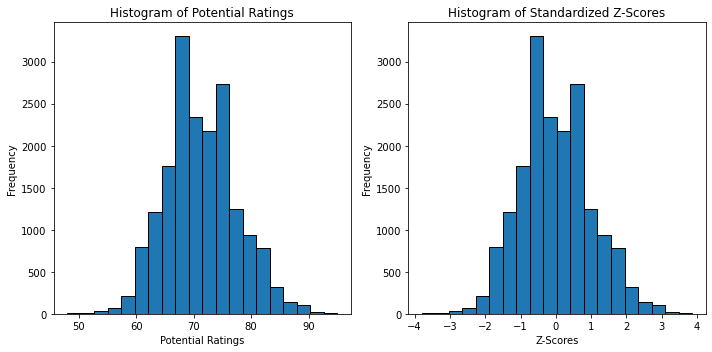

In [16]:
# Step 1: Calculate the mean and standard deviation of the 'Potential' column
mean_potential = df['Potential'].mean()
std_potential = df['Potential'].std()

# Step 2: Calculate the z-scores (standardization)
df['Z-score'] = (df['Potential'] - mean_potential) / std_potential

# Step 3: Visualize the original 'Potential' column and the standardized 'Z-score' column
plt.figure(figsize=(10, 5))

# Original 'Potential' column
plt.subplot(1, 2, 1)
plt.hist(df['Potential'], bins=20, edgecolor='black')
plt.title('Histogram of Potential Ratings')
plt.xlabel('Potential Ratings')
plt.ylabel('Frequency')

# Standardized 'Z-score' column
plt.subplot(1, 2, 2)
plt.hist(df['Z-score'], bins=20, edgecolor='black')
plt.title('Histogram of Standardized Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Que-4) find the 95%, 90%, and 99%, confidence interval for 'Potential','wage','weight' column.


In [17]:
# Confidence levels
confidence_levels = [0.95, 0.90, 0.99]

# Calculate the mean and standard error of the 'Potential' column
mean_potential = np.mean(df['Potential'])
std_error_potential = stats.sem(df['Potential'])

# Calculate the confidence intervals for 'Potential' at different confidence levels
for confidence_level in confidence_levels:
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(df['Potential']) - 1) * std_error_potential
    lower_bound = mean_potential - margin_of_error
    upper_bound = mean_potential + margin_of_error
    
    # Display the confidence intervals
    print("Confidence Interval for {}% Confidence Level:".format(int(confidence_level*100)))
    print("{:.2f}% Confidence Interval for 'Potential': ({:.2f}, {:.2f})".format(int(confidence_level*100), lower_bound, upper_bound))
    print()

Confidence Interval for 95% Confidence Level:
95.00% Confidence Interval for 'Potential': (71.22, 71.40)

Confidence Interval for 90% Confidence Level:
90.00% Confidence Interval for 'Potential': (71.23, 71.38)

Confidence Interval for 99% Confidence Level:
99.00% Confidence Interval for 'Potential': (71.19, 71.42)



In [18]:
# Calculate the mean and standard error of the 'Wage' column
mean_wage = np.mean(df['Wage'])
std_error_wage = stats.sem(df['Wage'])

# Calculate the confidence intervals for 'Wage' at different confidence levels
for confidence_level in confidence_levels:
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(df['Wage']) - 1) * std_error_wage
    lower_bound = mean_wage - margin_of_error
    upper_bound = mean_wage + margin_of_error
    
    # Display the confidence intervals
    print("Confidence Interval for {}% Confidence Level:".format(int(confidence_level*100)))
    print("{:.2f}% Confidence Interval for 'Wage': ({:.2f}, {:.2f})".format(int(confidence_level*100), lower_bound, upper_bound))
    print()

Confidence Interval for 95% Confidence Level:
95.00% Confidence Interval for 'Wage': (9.41, 10.05)

Confidence Interval for 90% Confidence Level:
90.00% Confidence Interval for 'Wage': (9.46, 10.00)

Confidence Interval for 99% Confidence Level:
99.00% Confidence Interval for 'Wage': (9.31, 10.15)



In [19]:
# Function to extract the numeric part from the 'Weight' column
def extract_numeric_weight(weight_str):
    if pd.notna(weight_str):
        return float(weight_str.replace('lbs', ''))
    else:
        return np.nan
df_copy3 = df.copy()

# Apply the function to convert 'Weight' values to numeric in the copied DataFrame
df_copy3['Weight_numeric'] = df_copy3['Weight'].apply(extract_numeric_weight)

# Drop rows with missing 'Weight' values
df_copy3.dropna(subset=['Weight_numeric'], inplace=True)

# Calculate the mean and standard error of the 'Weight_numeric' column
mean_weight = np.mean(df_copy3['Weight_numeric'])
std_error_weight = stats.sem(df_copy3['Weight_numeric'])

# Calculate the confidence intervals for 'Weight_numeric' at different confidence levels
for confidence_level in confidence_levels:
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(df_copy3['Weight_numeric']) - 1) * std_error_weight
    lower_bound = mean_weight - margin_of_error
    upper_bound = mean_weight + margin_of_error
    
    # Display the confidence intervals
    print("Confidence Interval for {}% Confidence Level:".format(int(confidence_level*100)))
    print("{:.2f}% Confidence Interval for 'Weight': ({:.2f}, {:.2f})".format(int(confidence_level*100), lower_bound, upper_bound))
    print()

Confidence Interval for 95% Confidence Level:
95.00% Confidence Interval for 'Weight': (165.75, 166.21)

Confidence Interval for 90% Confidence Level:
90.00% Confidence Interval for 'Weight': (165.79, 166.17)

Confidence Interval for 99% Confidence Level:
99.00% Confidence Interval for 'Weight': (165.68, 166.28)



## Que-5) Proove Central Limit Theorom by using 'potential' column of the game_data.			

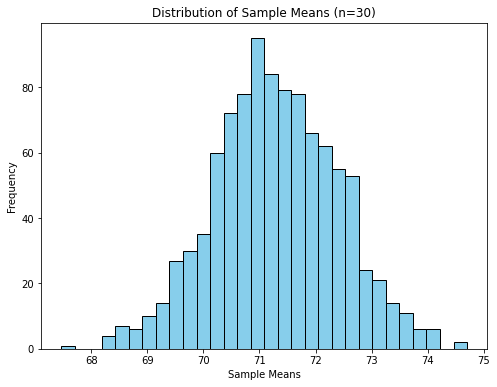

The distribution of sample means follows a normal distribution (CLT holds true).


In [20]:
df_copy6 = df.copy()

# Drop any missing values in the 'Potential' column
df_copy6.dropna(subset=['Potential'], inplace=True)

# Number of samples to take
num_samples = 1000

# Sample size for each sample
sample_size = 30

# Create an empty list to store the sample means
sample_means = []

# Perform multiple sampling and calculate sample means
for _ in range(num_samples):
    sample = np.random.choice(df_copy6['Potential'], size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot the distribution of sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

# Perform a normality test on the sample means (Shapiro-Wilk test)
statistic, p_value = shapiro(sample_means)

# Check if the data follows a normal distribution based on the p-value
if p_value > 0.05:
    print("The distribution of sample means follows a normal distribution (CLT holds true).")
else:
    print("The distribution of sample means does not follow a normal distribution (CLT does not hold true).")

## Exploratory Data Analysis

Before further analyzing the data, let's first remove the unnecessary columns from the dataset.

In [21]:
col_to_drop = ['ID', 'Flag', 'Name' , "Age" , "Photo" , "Club Logo" , "Joined" ]

In [22]:
for i in col_to_drop:
    df.drop(i, axis=1, inplace=True)

In [23]:
df.head()

,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Z-score
0,Spain,71,71,KAS Eupen,€750K,6.0,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,NaN,2019,5'10,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M,-0.050077
1,Spain,86,86,Vissel Kobe,€21.5M,21.0,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,NaN,2021,5'7,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,2.394315
2,Turkey,79,79,Medipol Başakşehir FK,€4M,23.0,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,NaN,2019,5'7,159lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,1.253598
3,Italy,70,70,Padova,€240K,2.0,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,NaN,2019,5'11,168lbs,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K,-0.213037
4,Wales,66,66,Notts County,€150K,4.0,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,NaN,2019,5'6,154lbs,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K,-0.864875


## Checking Nationality Of Players

In [24]:
df['Nationality'].value_counts()

Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
Wales                    129
Croatia                  126
Serbia                   126
Nigeria                  121
Gh

## Checking Top 15 Clubs 

<AxesSubplot:xlabel='Club', ylabel='count'>

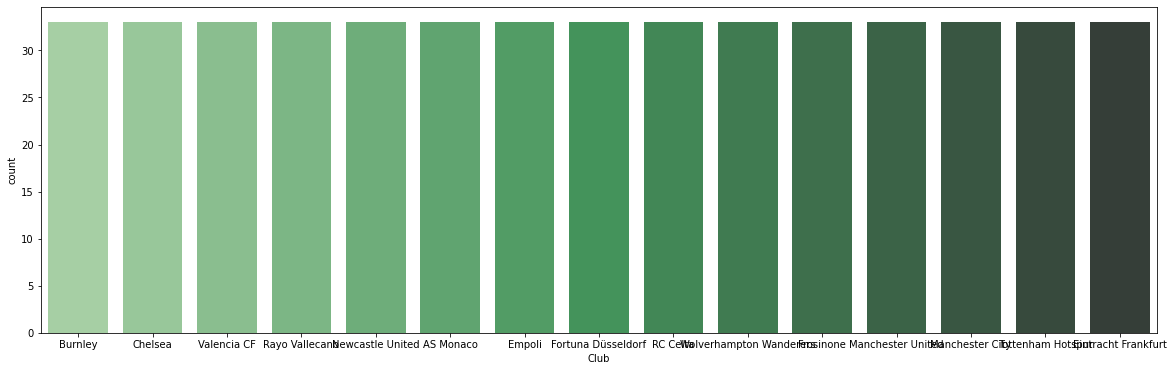

In [25]:
plt.figure(figsize=(20,6))

sns.countplot(x="Club",data=df, palette="Greens_d",order=df.Club.value_counts().iloc[:15].index)

## Checking Top 15 Countries By Data 

<AxesSubplot:xlabel='Nationality', ylabel='count'>

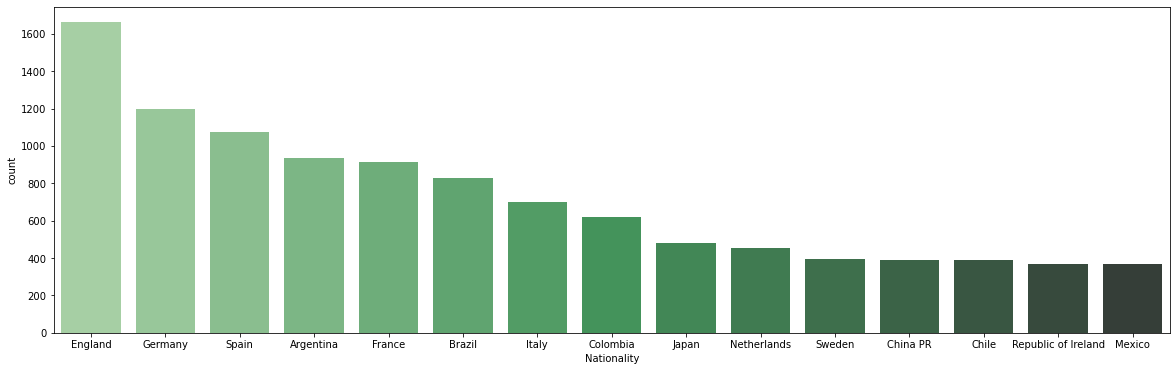

In [26]:
plt.figure(figsize=(20,6))

sns.countplot(x="Nationality",data=df, palette="Greens_d",order=df.Nationality.value_counts().iloc[:15].index)

## Checking Count Of Preferred Foot, We noticed that quite many players use left foot 

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

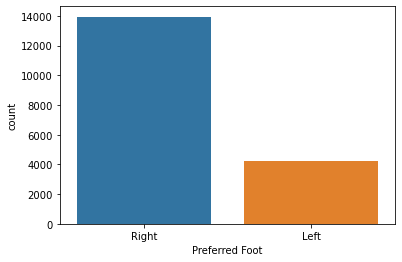

In [27]:
sns.countplot(x='Preferred Foot',data=df)

## Checking Top 5 Body Types Of Players

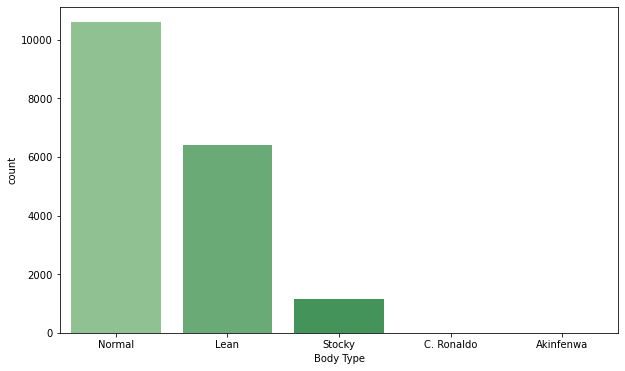

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Type", data=df, palette="Greens_d", order=df["Body Type"].value_counts().iloc[:5].index)
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nationality               18207 non-null  object 
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Club                      17966 non-null  object 
 4   Value                     18207 non-null  object 
 5   Wage                      18207 non-null  float64
 6   Special                   18207 non-null  int64  
 7   Preferred Foot            18159 non-null  object 
 8   International Reputation  18159 non-null  float64
 9   Weak Foot                 18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Work Rate                 18159 non-null  object 
 12  Body Type                 18159 non-null  object 
 13  Real Face                 18159 non-null  object 
 14  Positi

## Analysing The Height Of The Players

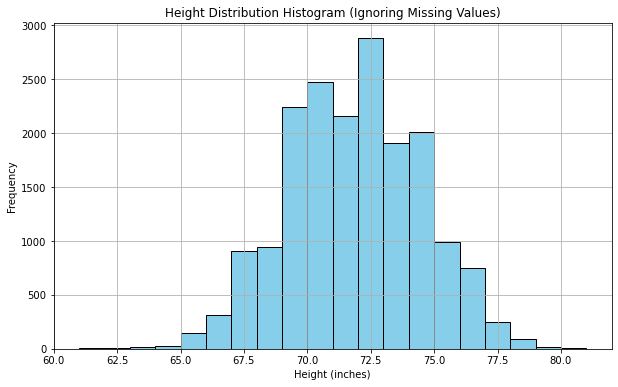

In [30]:
# Function to convert height from feet'inches format to inches
def height_to_inches(height_str):
    try:
        feet, inches = map(int, height_str.split("'"))
        return feet * 12 + inches
    except:
        return None

# Apply the conversion function to the 'height' column
df['Height'] = df['Height'].apply(height_to_inches)

# Filter the data to exclude missing values before plotting the histogram
height_values = df['Height'].dropna()

# Create a histogram without missing values
plt.figure(figsize=(10, 6))
plt.hist(height_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.title('Height Distribution Histogram (Ignoring Missing Values)')
plt.grid(True)
plt.show()

## Checking Top 15 Clubs By Value

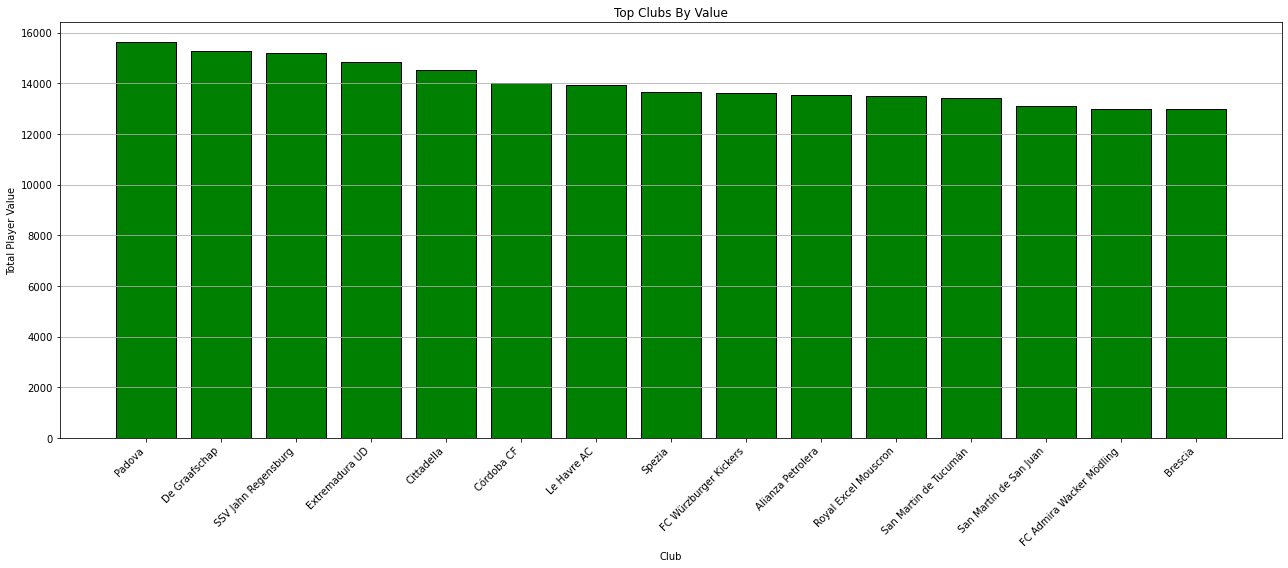

In [31]:
def value_to_numeric(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace('€', '').replace('K', '').replace('M', '')
        try:
            return float(value_str)
        except ValueError:
            return None  # Return None for any unexpected or invalid values
    else:
        return value_str

# Apply the conversion function to the 'Value' column
df['Value'] = df['Value'].apply(value_to_numeric)

# Remove rows with missing or unexpected values in the 'Value' column
df = df.dropna(subset=['Value'])

# Group the data by 'Club' and calculate the total value for each club
club_total_value = df.groupby('Club')['Value'].sum()

# Sort the clubs based on their total value in descending order
top_clubs = club_total_value.sort_values(ascending=False).head(15)

# Create a bar plot for the top clubs based on total value
plt.figure(figsize=(18, 8))
plt.bar(top_clubs.index, top_clubs.values, color='green', edgecolor='black')
plt.xlabel('Club')
plt.ylabel('Total Player Value')
plt.title('Top Clubs By Value')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Similarly Checking Top 15 Bottom Clubs By Value

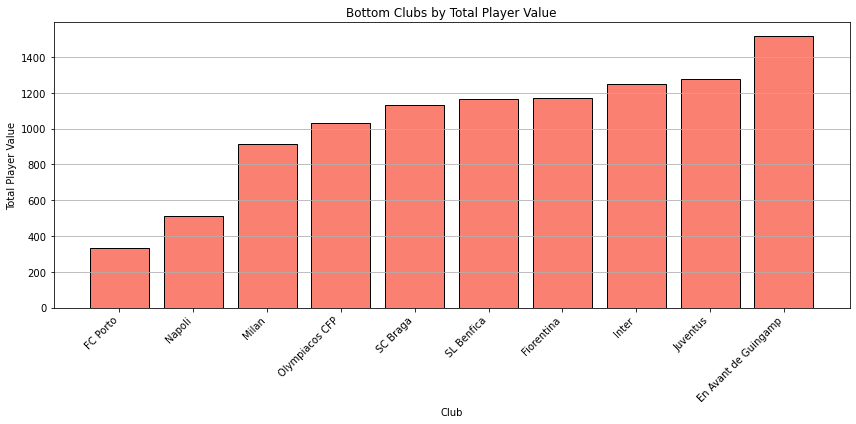

In [32]:
# Sort the clubs based on their total value in ascending order
bottom_clubs = club_total_value.sort_values().head(10)

# Create a bar plot for the bottom clubs based on total value
plt.figure(figsize=(12, 6))
plt.bar(bottom_clubs.index, bottom_clubs.values, color='salmon', edgecolor='black')
plt.xlabel('Club')
plt.ylabel('Total Player Value')
plt.title('Bottom Clubs by Total Player Value')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Top 5 Nationality By Value

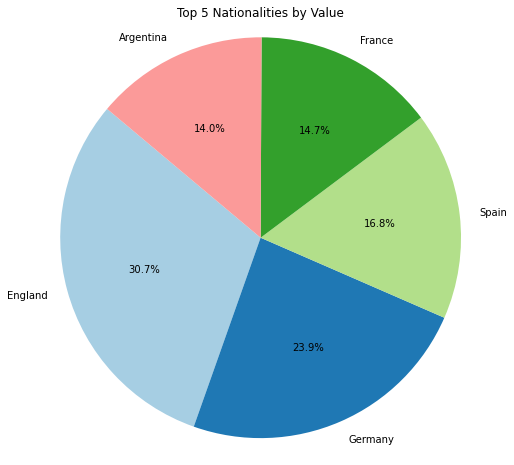

In [33]:
# Convert the "Value" column to numeric (in millions) based on the suffix "K" or "M"
def value_to_numeric(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace('€', '').replace('K', '').replace('M', '')
        try:
            return float(value_str)
        except ValueError:
            return None  # Return None for any unexpected or invalid values
    else:
        return value_str

# Apply the conversion function to the 'Value' column
df['Value'] = df['Value'].apply(value_to_numeric)

# Remove rows with missing or unexpected values in the 'Value' column and create a new DataFrame
df_filtered = df.dropna(subset=['Value'], inplace=False)

# Group the data by 'Nationality' and calculate the total value for each nationality
nationality_total_value = df_filtered.groupby('Nationality')['Value'].sum()

# Sort the nationalities based on their total value in descending order
top_5_nationalities = nationality_total_value.sort_values(ascending=False).head(5)

# Create a pie chart of the top 5 nationalities by total player value
plt.figure(figsize=(8, 8))
plt.pie(top_5_nationalities, labels=top_5_nationalities.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Nationalities by Value')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [34]:
df.head()

,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Z-score
0,Spain,71,71,KAS Eupen,750.0,6.0,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,NaN,2019,70.0,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M,-0.050077
1,Spain,86,86,Vissel Kobe,21.5,21.0,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,NaN,2021,67.0,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,2.394315
2,Turkey,79,79,Medipol Başakşehir FK,4.0,23.0,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,NaN,2019,67.0,159lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,1.253598
3,Italy,70,70,Padova,240.0,2.0,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,NaN,2019,71.0,168lbs,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K,-0.213037
4,Wales,66,66,Notts County,150.0,4.0,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,NaN,2019,66.0,154lbs,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K,-0.864875


## Top 5 Counties By Average Skills Ratings 

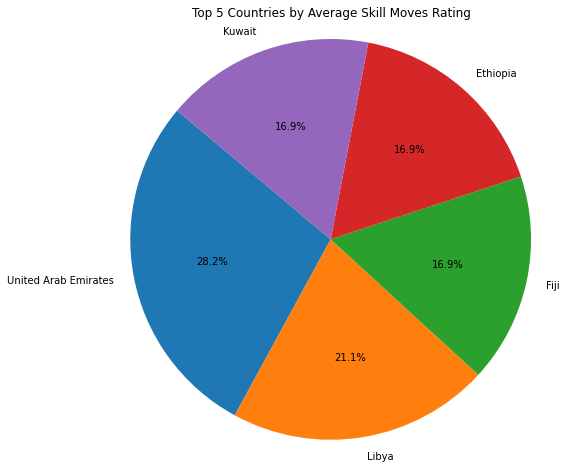

In [35]:
# Group the data by 'Nationality' and calculate the average "Skill Moves" rating for each nationality
nationality_avg_skill_moves = df.groupby('Nationality')['Skill Moves'].mean()

# Sort the nationalities based on their average "Skill Moves" rating in descending order
top_5_countries_skill_moves = nationality_avg_skill_moves.sort_values(ascending=False).head(5)

# Create a pie chart of the top 5 countries by average "Skill Moves" rating
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries_skill_moves, labels=top_5_countries_skill_moves.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Average Skill Moves Rating')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [36]:
df.head()

,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Z-score
0,Spain,71,71,KAS Eupen,750.0,6.0,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,NaN,2019,70.0,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M,-0.050077
1,Spain,86,86,Vissel Kobe,21.5,21.0,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,NaN,2021,67.0,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,2.394315
2,Turkey,79,79,Medipol Başakşehir FK,4.0,23.0,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,NaN,2019,67.0,159lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,1.253598
3,Italy,70,70,Padova,240.0,2.0,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,NaN,2019,71.0,168lbs,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K,-0.213037
4,Wales,66,66,Notts County,150.0,4.0,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,NaN,2019,66.0,154lbs,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K,-0.864875


## Top 5 Countries by Average International Reputation Rating

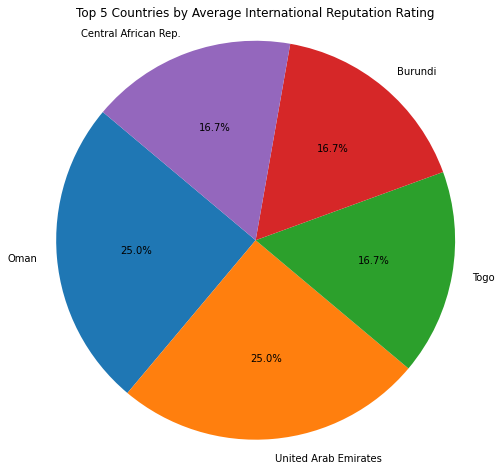

In [37]:
# Group the data by 'Nationality' and calculate the average "International Reputation" rating for each nationality
nationality_avg_reputation = df.groupby('Nationality')['International Reputation'].mean()

# Sort the nationalities based on their average "International Reputation" rating in descending order
top_5_countries_reputation = nationality_avg_reputation.sort_values(ascending=False).head(5)

# Create a pie chart of the top 5 countries by average "International Reputation" rating
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries_reputation, labels=top_5_countries_reputation.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Average International Reputation Rating')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

## Top 15 Nationalities by Average Potential Rating

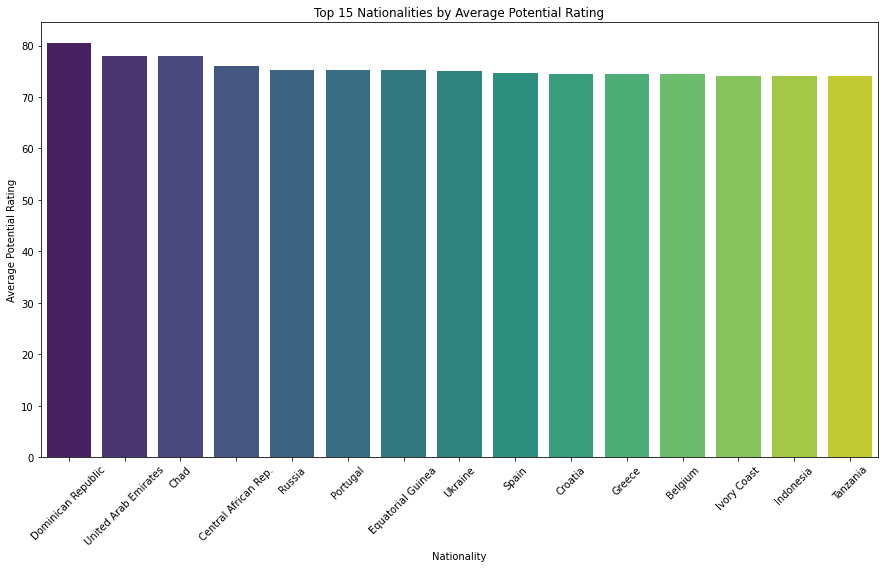

In [38]:
# Calculate the average "Potential" rating for each nationality
average_potential_by_nationality = df.groupby('Nationality')['Potential'].mean().reset_index()

# Sort the nationalities based on their average "Potential" rating in descending order
sorted_nationalities = average_potential_by_nationality.sort_values(by='Potential', ascending=False)

# Select the top 5 nationalities
top_5_nationalities = sorted_nationalities.head(15)

# Create a bar plot to show the average "Potential" rating for the top 5 nationalities
plt.figure(figsize=(15, 8))
sns.barplot(x='Nationality', y='Potential', data=top_5_nationalities, palette='viridis')
plt.title('Top 15 Nationalities by Average Potential Rating')
plt.xlabel('Nationality')
plt.ylabel('Average Potential Rating')
plt.xticks(rotation=45)
plt.show()

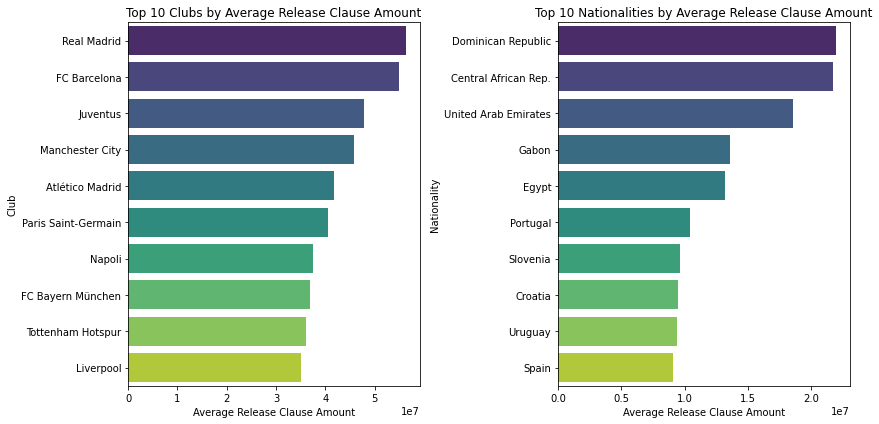

In [39]:
def release_clause_to_numeric(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        try:
            return float(value_str)
        except ValueError:
            return None  # Return None for any unexpected or invalid values
    else:
        return value_str

# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Apply the conversion function to the 'Release Clause' column in the copied DataFrame
df_copy['Release Clause'] = df_copy['Release Clause'].apply(release_clause_to_numeric)

# Remove rows with missing or unexpected values in the 'Release Clause' column in the copied DataFrame
df_copy.dropna(subset=['Release Clause'], inplace=True)

# Group the data by 'Club' and calculate the average "Release Clause" amount for each club
average_release_clause_by_club = df_copy.groupby('Club')['Release Clause'].mean().reset_index()

# Group the data by 'Nationality' and calculate the average "Release Clause" amount for each nationality
average_release_clause_by_nationality = df_copy.groupby('Nationality')['Release Clause'].mean().reset_index()

# Sort the data in descending order based on the average "Release Clause" amount
top_10_clubs = average_release_clause_by_club.sort_values(by='Release Clause', ascending=False).head(10)
top_10_nationalities = average_release_clause_by_nationality.sort_values(by='Release Clause', ascending=False).head(10)

# Create bar plots for top 10 clubs and top 10 nationalities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Release Clause', y='Club', data=top_10_clubs, palette='viridis')
plt.title('Top 10 Clubs by Average Release Clause Amount')
plt.xlabel('Average Release Clause Amount')
plt.ylabel('Club')

plt.subplot(1, 2, 2)
sns.barplot(x='Release Clause', y='Nationality', data=top_10_nationalities, palette='viridis')
plt.title('Top 10 Nationalities by Average Release Clause Amount')
plt.xlabel('Average Release Clause Amount')
plt.ylabel('Nationality')

plt.tight_layout()
plt.show()

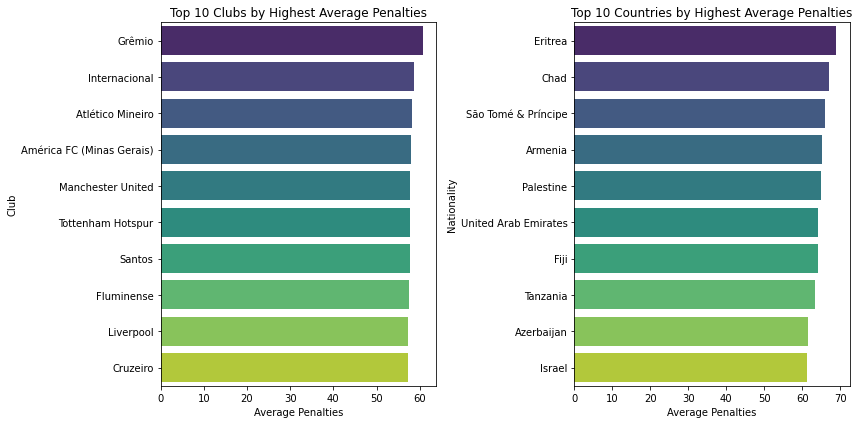

In [40]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy2 = df.copy()

# Calculate the average "Penalties" rating for each club and nationality
average_penalties_by_club = df_copy2.groupby('Club')['Penalties'].mean().reset_index()
average_penalties_by_nationality = df_copy2.groupby('Nationality')['Penalties'].mean().reset_index()

# Sort the data in descending order based on the average "Penalties" rating
top_10_clubs = average_penalties_by_club.sort_values(by='Penalties', ascending=False).head(10)
top_10_countries = average_penalties_by_nationality.sort_values(by='Penalties', ascending=False).head(10)

# Create bar plots for top 10 clubs and top 10 countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Penalties', y='Club', data=top_10_clubs, palette='viridis')
plt.title('Top 10 Clubs by Highest Average Penalties')
plt.xlabel('Average Penalties')
plt.ylabel('Club')

plt.subplot(1, 2, 2)
sns.barplot(x='Penalties', y='Nationality', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Highest Average Penalties')
plt.xlabel('Average Penalties')
plt.ylabel('Nationality')

plt.tight_layout()
plt.show()

## While there are various other attributes in the dataset, it is important to note that we currently lack the descriptions of these attributes. Without understanding the meaning and context of each attribute, performing any analysis would be meaningless.